In [1]:
#importing the needed libraries 
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from matplotlib.gridspec import GridSpec
from matplotlib.animation import Animation

In [2]:
#importing and preprocessing the covid-19 data
data=pd.read_csv('covid_19_clean_complete.csv')
data.drop(['Province/State','Lat','Long'],axis=1,inplace=True)
countylist=data['Country/Region'].unique().tolist()
new_data=data.groupby(['Country/Region','Date'])['Confirmed','Deaths','Recovered'].agg(np.sum)
new_data=new_data.reset_index().sort_values('Date').reset_index().drop('index',axis=1)
new_data['Date']=new_data['Date'].map(pd.to_datetime)
new_data.sort_values('Date',inplace=True)

In [4]:
#creating the polt fuction which is based on the country we choose from the drop list
def plotcount(change):
    
    clear_output() #every time the function is called the output will be cleared 
     
    #collecting the data about the choosen country and sorting them by the dta   
    country = new_data[new_data['Country/Region'] == a.value].sort_values('Date')
    
    #calculating the daily increment
    dailyinc = country.sort_values('Date').reset_index()['Confirmed'].diff(1).fillna(0) 
    
    #replacing the time stamp format by another which is smaller and easier to read
    datestoberep=[pd.Timestamp('2020-01-25 00:00:00'),
        pd.Timestamp('2020-02-04 00:00:00'),
        pd.Timestamp('2020-02-14 00:00:00'),
        pd.Timestamp('2020-02-24 00:00:00'),
        pd.Timestamp('2020-03-05 00:00:00'),
        pd.Timestamp('2020-03-15 00:00:00'),
        pd.Timestamp('2020-03-23 00:00:00'),
        pd.Timestamp('2020-03-29 00:00:00')]
    thereplace=['jan 25','feb 04','feb 14','feb 24','mar 05','mar 15','mar 23','mar 29']
    
    #a is the widget drop list that we use to choose the country
    display(a)
    
    #initializing the plot settings
    fig = plt.figure(figsize=(9,9))

    gs = fig.add_gridspec(3,7)
    
    gs.update(wspace = 0.5, hspace = 0.8)
    
    ax1 = fig.add_subplot(gs[0:2, 0:2])
    ax2 = fig.add_subplot(gs[0:2, 2:5])
    ax3 = fig.add_subplot(gs[0:2, 5:7])
    ax4 = fig.add_subplot(gs[2  , 2:5],sharex=ax2)

    fig.suptitle('Covid-19 Coronavirus Cases Statistics in '+a.value ,size =20)
    
    ax2.plot(country['Date'],country['Confirmed'],'--o')
    
    ax1.plot(country['Date'][30:],country['Recovered'][30:],'-g',scaley=True)
    
    ax3.plot(country['Date'][30:],country['Deaths'][30:],'-r',scaley=True)
    
    ax4.plot(country['Date'],dailyinc,'-')
    
    ax2.tick_params(axis="y",direction="in",pad=-30 )
    ax3.yaxis.tick_right()
    
    ax2.xaxis.set_ticks(datestoberep)
    ax2.xaxis.set_ticklabels(thereplace)
    
    ax1.xaxis.set_ticks(datestoberep[3:])
    ax1.xaxis.set_ticklabels(thereplace[3:])
    
    ax3.xaxis.set_ticks(datestoberep[3:])
    ax3.xaxis.set_ticklabels(thereplace[3:])
    
    ax1.xaxis.set_tick_params(rotation=45)
    ax2.xaxis.set_tick_params(rotation=45,size=0)
    ax3.xaxis.set_tick_params(rotation=45)
    ax4.xaxis.set_tick_params(rotation=45)
    
    ax1.yaxis.grid(color='gray', linestyle='dashed')
    ax2.yaxis.grid(color='gray', linestyle='dashed')
    ax3.yaxis.grid(color='gray', linestyle='dashed')
    ax4.yaxis.grid(color='gray', linestyle='dashed')
    
    ax3.set_title('Deceased cases')
    ax1.set_title('Recovered cases')
    ax4.set_title('Daily increment')
    ax2.set_title('Total infected cases')
    
    
    #creating the function which will react with the mouse motion to tell us the number of affected persons at every point
    def onclick(event):
        
        #taking the cordinates of the mouse cursor
        ax = event.inaxes
        
        #specifing which polt the mouse cursor is on
        
        if ax == ax1: #the first plot
            
            ax1.legend([str(int(event.ydata))+' persons'],loc=2)
            ax2.legend([""],loc=9)
            ax3.legend([""],loc=2)
            ax4.legend([""],loc=2)
            
        elif ax == ax2: #the 2nd plot
            
            ax2.legend([str(int(event.ydata))+' persons'],loc=9)
            ax1.legend([""],loc=2)
            ax3.legend([""],loc=2)
            ax4.legend([""],loc=2)
            
        elif ax == ax3: #the 3rd plot
            
            ax3.legend([str(int(event.ydata))+' persons'],loc=2)
            ax2.legend([""],loc=9)
            ax1.legend([""],loc=2)
            ax4.legend([""],loc=2)
            
        elif ax == ax4: #the 4th plot
            
            ax4.legend([str(int(event.ydata))+' persons'],loc=2)
            ax2.legend([""],loc=9)
            ax3.legend([""],loc=2)
            ax1.legend([""],loc=2)
        
    
    #activating the oneclick function when the event is activated
    cid = fig.canvas.mpl_connect('motion_notify_event', onclick)
    
    plt.show()
    pass

Dropdown(description='choose one:', index=8, options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola'…

<IPython.core.display.Javascript object>


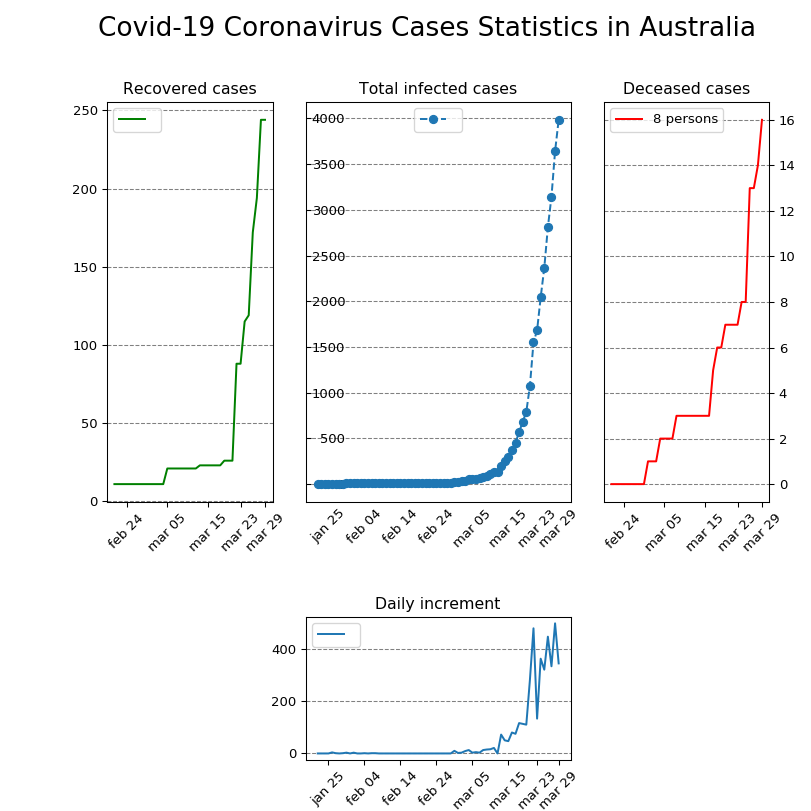

In [5]:
#a is the widget drop list that we use to choose the country
a = widgets.Dropdown(options=countylist,description='choose one:',value=countylist[0])
display(a)

#initializing the plot settings
fig = plt.figure(figsize=(9,9))

gs = fig.add_gridspec(3,7)
    
gs.update(wspace = 0.5, hspace = 0.8)
    
ax1 = fig.add_subplot(gs[0:2, 0:2])
ax2 = fig.add_subplot(gs[0:2, 2:5])
ax3 = fig.add_subplot(gs[0:2, 5:7])
ax4 = fig.add_subplot(gs[2  , 2:5],sharex=ax2)
fig.suptitle('Please, Select a country from the list.....',size=20)
plt.show()

a.observe(plotcount)